In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 0
  use Clemens 85?                         0
  use Knapp+ 85?                          1
  use Luna+ 06?                           0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                     

In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing CO terminal velocities...
 processing Knapp+ 85...
  selected  37  CO terminal velocities
processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [7]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [8]:
print len(vecRp),len(vecvRp)

598 598


Text(0,0.5,'$V_{c}(R)/km s^{-1}$')

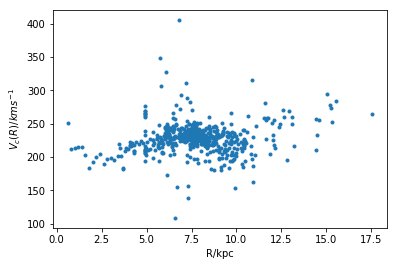

In [9]:
plt.plot(vecRp,vecvRp,'.')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/km s^{-1}$')

In [10]:
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 2.44e-22#eV
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [11]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

In [12]:
Vc2_b_I = Vc2_b(vecRp,rho_b=rho_b_I)
Vc2_b_II = Vc2_b(vecRp,rho_b=rho_b_II)

In [13]:
def M_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d

In [14]:
def M_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

In [15]:
def vc2_DM_axion(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor(r[i],rho_sol,m_a)/r[i])
        else:
            result.append(G*M_mayor(r[i],rho_sol,m_a,eps,r_s)/r[i])
    return np.array(result)

In [16]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [17]:
Vc2_SD_I = Vc2_SD_simps(vecRp,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)
Vc2_SD_II = Vc2_SD_simps(vecRp,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)

In [18]:
def Vc2_ISM_ap(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

In [19]:
Vc2_ISM_ap_I = Vc2_ISM_ap(vecRp,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)
Vc2_ISM_ap_II = Vc2_ISM_ap(vecRp,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II)

# Malla de $\rho_{sol}$,$m_{a}$, $\varepsilon$ y $r_{s}$

In [20]:
rho_sol_grid = np.linspace(np.log(1.0e7),np.log(9.0e13),10)
m_a_grid = np.linspace(np.log(1.0e-22),np.log(9.0e-20),10)
epsilon_grid = np.linspace(0.0001,0.2,10)
r_s_grid = np.linspace(0.1,15.,10)

In [21]:
def Vc_tot_rho_sol_m_a_eps_r_s_I(r,params):
    rho_sol,m_a,eps,r_s = params
    suma = Vc2_b_I + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [22]:
def Xi2_rho_sol_m_a_r_s_epsI(parameters):
    rho_sol,m_a,eps,r_s = parameters
    par = np.exp(rho_sol),np.exp(m_a),eps,r_s
    model = Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [23]:
Xi_grid = []
for i in range(len(rho_sol_grid)):
    for j in range(len(m_a_grid)):
        for k in range(len(epsilon_grid)):
            for l in range(len(r_s_grid)):
                param=np.array([rho_sol_grid[i],m_a_grid[j],epsilon_grid[k],r_s_grid[l]])
                Xi_grid.append(Xi2_rho_sol_m_a_r_s_epsI(param))
#print Xi_grid

In [24]:
print min(Xi_grid)
Xi_grid_array = np.array(Xi_grid)

2253.0954853292387


In [25]:
print min(Xi_grid)
Xi_grid_array = np.array(Xi_grid)

2253.0954853292387


In [26]:
def which(array):
    for i in range(len(array)):
        if array[i]==min(array):
            print i

In [27]:
which(Xi_grid_array)

8109


In [28]:
len(Xi_grid)

10000

In [29]:
test = np.array([rho_sol_grid[4],m_a_grid[4],epsilon_grid[0],r_s_grid[4]])
print test

[ 2.32348668e+01 -4.76335855e+01  1.00000000e-04  6.72222222e+00]


In [30]:
Xi2_rho_sol_m_a_r_s_epsI(test)

54633.99492082823

In [31]:
cont=0
Xi_test=[]
for i in range(len(rho_sol_grid)):
    for j in range(len(m_a_grid)):
        for k in range(len(epsilon_grid)):
            for l in range(len(r_s_grid)):
                param=np.array([rho_sol_grid[i],m_a_grid[j],epsilon_grid[k],r_s_grid[l]])
                Xi_test.append(Xi2_rho_sol_m_a_r_s_epsI(param))
                cont=cont+1
                if cont==5505:
                    print i,j,k,l,param

5 5 0 4 [ 2.50140596e+01 -4.68777638e+01  1.00000000e-04  6.72222222e+00]


In [32]:
print np.exp(25.01405962),np.exp(-46.87776384)

73024411039.66887 4.377698426491083e-21


In [33]:
np.array([ 25.01405962,-46.87776384,0.1,6.72222222])

array([ 25.01405962, -46.87776384,   0.1       ,   6.72222222])

In [34]:
Xi2_rho_sol_m_a_r_s_epsI(np.array([rho_sol_grid[5],m_a_grid[5],epsilon_grid[0],r_s_grid[5]]))

54444.91483778927

In [35]:
params_Xi_grid=np.array([np.exp(rho_sol_grid[5]),np.exp(m_a_grid[5]),epsilon_grid[0],r_s_grid[5]])
print params_Xi_grid

[7.30244107e+10 4.37769841e-21 1.00000000e-04 8.37777778e+00]


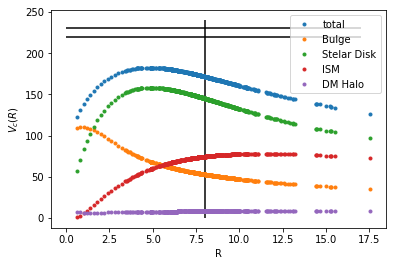

In [36]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,params_Xi_grid),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(params_Xi_grid[0]),m_a=np.asscalar(params_Xi_grid[1]),eps=np.asscalar(params_Xi_grid[2]),r_s=np.asscalar(params_Xi_grid[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# Usando minimize en un pequeño rango

In [72]:
x0_rho_sol_m_a_r_s_epsI = np.array([np.log(1.0e10),np.log(1.0e-21),0.001,5.0])

In [73]:
LS_rho_sol_m_a_r_s_epsI = minimize(Xi2_rho_sol_m_a_r_s_epsI,x0_rho_sol_m_a_r_s_epsI,method='L-BFGS-B',bounds=((np.log(1.0e10),np.log(9.0e11)),(np.log(1.0e-21),np.log(1.0e-20)),(0.001,0.1),(5.0,10.0),))

In [74]:
print LS_rho_sol_m_a_r_s_epsI

      fun: 2367.4744932565504
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -4.2190095 ,   15.27569111, -128.92419363,    2.89742275])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 590
      nit: 79
   status: 0
  success: True
        x: array([ 2.67051531e+01, -4.83542870e+01,  7.81111415e-03,  9.10140377e+00])


In [75]:
pars_rho_sol_m_a_r_s_epsI_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsI.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsI.x[1]),LS_rho_sol_m_a_r_s_epsI.x[2],LS_rho_sol_m_a_r_s_epsI.x[3]])
print pars_rho_sol_m_a_r_s_epsI_min

[3.96187383e+11 1.00000000e-21 7.81111415e-03 9.10140377e+00]


In [42]:
LS_rho_sol_m_a_r_s_epsI_TNC = minimize(Xi2_rho_sol_m_a_r_s_epsI,x0_rho_sol_m_a_r_s_epsI,method='TNC',bounds=((np.log(1.0e10),np.log(9.0e11)),(np.log(1.0e-21),np.log(1.0e-20)),(0.001,0.1),(5.0,10.0),))

In [43]:
print LS_rho_sol_m_a_r_s_epsI_TNC

     fun: 2379.3683164555596
     jac: array([ -131.07096493,    92.25614122, -1468.91061377,   -26.95928742])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 16
  status: 3
 success: False
       x: array([ 24.35958284, -48.17765105,   0.08940217,   7.11137723])


In [44]:
pars_rho_sol_m_a_r_s_epsI_TNC_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[1]),LS_rho_sol_m_a_r_s_epsI_TNC.x[2],LS_rho_sol_m_a_r_s_epsI_TNC.x[3]])
print pars_rho_sol_m_a_r_s_epsI_TNC_min

[3.79518025e+10 1.19319658e-21 8.94021682e-02 7.11137723e+00]


In [45]:
AIC_TNC_I= LS_rho_sol_m_a_r_s_epsI_TNC.fun -6.

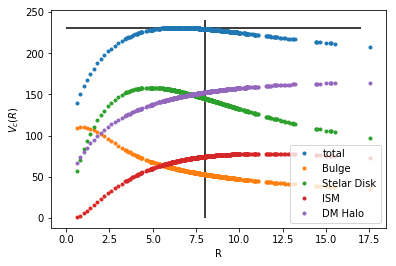

In [79]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,pars_rho_sol_m_a_r_s_epsI_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsI.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsI.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_I_BFGS.pdf')

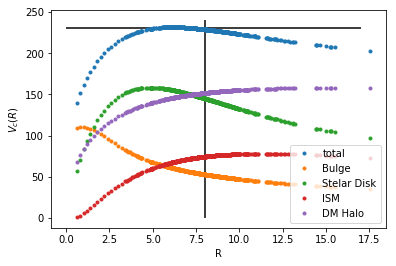

In [78]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,pars_rho_sol_m_a_r_s_epsI_TNC_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsI_TNC.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsI_TNC.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_I_TNC.pdf')

# Malla para el modelo II

In [48]:
def Vc_tot_rho_sol_m_a_eps_r_s_II(r,params):
    rho_sol,m_a,eps,r_s = params
    suma = Vc2_b_II + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_II + Vc2_ISM_ap_II
    return np.sqrt(suma)

In [49]:
def Xi2_rho_sol_m_a_r_s_epsII(parameters):
    rho_sol,m_a,eps,r_s = parameters
    par = np.exp(rho_sol),np.exp(m_a),eps,r_s
    model = Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [50]:
Xi_grid_II = []
for i in range(len(rho_sol_grid)):
    for j in range(len(m_a_grid)):
        for k in range(len(epsilon_grid)):
            for l in range(len(r_s_grid)):
                param=np.array([rho_sol_grid[i],m_a_grid[j],epsilon_grid[k],r_s_grid[l]])
                Xi_grid_II.append(Xi2_rho_sol_m_a_r_s_epsII(param))
print Xi_grid_II

[177536.8544638228, 177536.5789526528, 177536.3802018572, 177536.22980759988, 177536.11191234126, 177536.016941962, 177535.93876353325, 177535.87326172125, 177535.81756961072, 177535.76962730222, 177140.02867610063, 176986.68308951077, 176876.77154320406, 176794.17456496705, 176729.83558867982, 176678.29766457347, 176636.08104617737, 176600.86292434638, 176571.0336141105, 176545.44234633274, 176912.45959423686, 176608.97543374932, 176390.56823961026, 176226.14785109786, 176097.95852555573, 175995.22470464537, 175911.04906477118, 175840.8172584145, 175781.32712833118, 175730.2873443734, 176753.5161828437, 176308.33439905592, 175986.84855638308, 175744.47691930208, 175555.37712287583, 175403.76941169158, 175279.52157465587, 175175.84285579316, 175088.01548685852, 175012.66116509895, 176638.34573674714, 176059.39229310083, 175639.99875486136, 175323.40934928117, 175076.25089587815, 174878.03029411074, 174715.55200361722, 174579.95817696687, 174465.08900825176, 174366.53082512674, 176554.9

In [51]:
Xi_grid_array_II = np.array(Xi_grid_II)
print min(Xi_grid_II)

2354.1508002230025


In [52]:
which(Xi_grid_array_II)

4092


In [53]:
cont_II=0
Xi_test_II=[]
for i in range(len(rho_sol_grid)):
    for j in range(len(m_a_grid)):
        for k in range(len(epsilon_grid)):
            for l in range(len(r_s_grid)):
                param_II=np.array([rho_sol_grid[i],m_a_grid[j],epsilon_grid[k],r_s_grid[l]])
                Xi_test_II.append(Xi2_rho_sol_m_a_r_s_epsII(param_II))
                cont_II=cont_II+1
                if cont==5202:
                    print i,j,k,l,param

In [54]:
contador=0
Xi_test_II=[]
for i in range(len(rho_sol_grid)):
    for j in range(len(m_a_grid)):
        for k in range(len(epsilon_grid)):
            for l in range(len(r_s_grid)):
                params=np.array([rho_sol_grid[i],m_a_grid[j],epsilon_grid[k],r_s_grid[l]])
                Xi_test_II.append(Xi2_rho_sol_m_a_r_s_epsII(params))
                contador=contador+1
                if contador==5202:
                    print i,j,k,l,param

5 2 0 1 [ 32.13083079 -43.85447728   0.2         15.        ]


In [55]:
Xi2_rho_sol_m_a_r_s_epsII(np.array([rho_sol_grid[5],m_a_grid[2],epsilon_grid[0],r_s_grid[2]]))

176182.07394338335

In [56]:
params_Xi_grid_II = np.array([np.exp(rho_sol_grid[5]),np.exp(m_a_grid[2]),epsilon_grid[0],r_s_grid[2]])
print params_Xi_grid_II

[7.30244107e+10 4.53417560e-22 1.00000000e-04 3.41111111e+00]


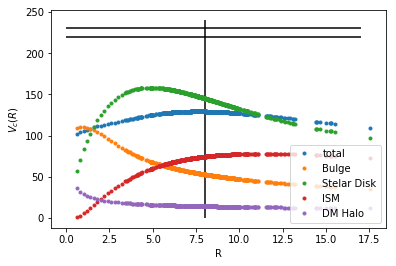

In [57]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,params_Xi_grid_II),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(params_Xi_grid_II[0]),m_a=np.asscalar(params_Xi_grid_II[1]),eps=np.asscalar(params_Xi_grid_II[2]),r_s=np.asscalar(params_Xi_grid_II[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# usando minimize

In [58]:
x0_rho_sol_m_a_r_s_epsII = np.array([np.log(1.0e10),np.log(1.0e-22),0.0000000000001,2.])

In [59]:
LS_rho_sol_m_a_r_s_epsII = minimize(Xi2_rho_sol_m_a_r_s_epsII,x0_rho_sol_m_a_r_s_epsII,method='L-BFGS-B',bounds=((np.log(1.0e10),np.log(9.0e13)),(np.log(1.0e-22),np.log(1.0e-20)),(0.0000000000001,0.1),(2.0,5.0),))

In [60]:
print LS_rho_sol_m_a_r_s_epsII

      fun: 2321.8489400833687
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -177.54114197,   167.13293007, -1857.07203855,  -267.65760595])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 245
      nit: 35
   status: 0
  success: True
        x: array([ 24.47200539, -50.61479166,   0.09144743,   2.28473447])


In [61]:
pars_rho_sol_m_a_r_s_epsII_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsII.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsII.x[1]),LS_rho_sol_m_a_r_s_epsII.x[2],LS_rho_sol_m_a_r_s_epsII.x[3]])
print pars_rho_sol_m_a_r_s_epsII_min

[4.24675200e+10 1.04297832e-22 9.14474334e-02 2.28473447e+00]


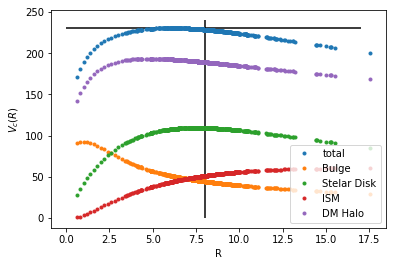

In [76]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,pars_rho_sol_m_a_r_s_epsII_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsII.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsII.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_II_BFGS.pdf')

In [63]:
x0_rho_sol_m_a_r_s_epsII_TNC = np.array([np.log(1.0e10),np.log(1.0e-22),0.0000000000001,2.])

In [64]:
LS_rho_sol_m_a_r_s_epsII_TNC = minimize(Xi2_rho_sol_m_a_r_s_epsII,x0_rho_sol_m_a_r_s_epsII_TNC,method='TNC',bounds=((np.log(1.0e10),np.log(9.0e13)),(np.log(1.0e-22),np.log(1.0e-20)),(0.0000000000001,0.1),(2.0,5.0),))

In [65]:
print LS_rho_sol_m_a_r_s_epsII_TNC

     fun: 2237.364340992276
     jac: array([-6.80556377e+02,  5.68249834e+02, -1.87061115e+06, -3.41146915e+02])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 21
  status: 3
 success: False
       x: array([ 3.11574031e+01, -4.95406950e+01,  4.28329879e-04,  2.96111858e+00])


In [66]:
pars_rho_sol_m_a_r_s_epsII_TNC_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsII_TNC.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsII_TNC.x[1]),LS_rho_sol_m_a_r_s_epsII_TNC.x[2],LS_rho_sol_m_a_r_s_epsII_TNC.x[3]])
print pars_rho_sol_m_a_r_s_epsII_TNC_min

[3.40007291e+13 3.05315978e-22 4.28329879e-04 2.96111858e+00]


In [67]:
AIC_TNC_II = LS_rho_sol_m_a_r_s_epsII_TNC.fun-6.

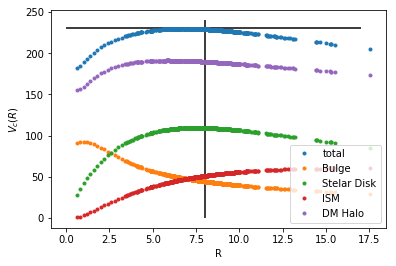

In [77]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,pars_rho_sol_m_a_r_s_epsII_TNC_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII_TNC.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII_TNC.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsII_TNC.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsII_TNC.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_II_TNC.pdf')